In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import torch.onnx as onnx
import torchvision.models as models
import torch.nn.functional as F
import torchvision
import cv2
from matplotlib import pyplot as plt 
from tensorboardX import SummaryWriter


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=100, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size=100, shuffle = True)

train_size = len(train_dataloader.dataset)
test_size = len(test_dataloader.dataset)
print("train_size: %d"%train_size)
print("test_size: %d"%test_size)

# images, lables = next(iter(train_dataloader))
# img = torchvision.utils.make_grid(images, nrow = 10)
# img = img.numpy().transpose(1, 2, 0)
# cv2.imshow('img', img)
# cv2.waitKey(0)

class NeuralNetwork(nn.Module):
    def __init__(self):
      super(NeuralNetwork, self).__init__()
      self.conv1 = nn.Conv2d(1, 6, 5, 1)
      self.conv2 = nn.Conv2d(6, 12, 3, 1)

      self.fc1 = nn.Linear(300, 120)
      self.fc2 = nn.Linear(120, 84)
      self.fc3 = nn.Linear(84, 10)

    # x represents our data
    def forward(self, x):
      # Pass data through conv1
      x = self.conv1(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2)

      x = self.conv2(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2)

      x = torch.flatten(x, 1)

  
      x = self.fc1(x)
      x = F.relu(x)

      x = self.fc2(x)
      x = F.relu(x)
      
      x = self.fc3(x)

      # Apply softmax to x 
      output = F.log_softmax(x, dim=1)
      return output

model = NeuralNetwork()

learning_rate = 1e-3
batch_size = 100
epochs = 400

dummpy_input = torch.rand(1, 1, 28, 28)
with SummaryWriter('runs/NeuralNetwork/model') as w:
    w.add_graph(model, (dummpy_input,))


writer = SummaryWriter('runs/NeuralNetwork/data')

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        writer.add_scalar("train_loss",loss, t)

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f" loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0
    epoch = 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= size
    correct /= size


    writer.add_scalar("test_loss", test_loss, t)
    writer.add_scalar("test_acc", correct*100, t)

    print(f" test error: \n accuracy: {(100*correct):>0.1f}%, avg loss: {test_loss:>8f}\n")


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for t in range(epochs):
    print(f" epoch {t + 1}\n---------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print(" done !")
writer.close()
torch.save(model.state_dict(), "cnn_model.pth")



st error: 
 accuracy: 98.6%, avg loss: 0.000463

 epoch 324
---------------
 loss: 0.010013 [    0/60000]
 loss: 0.013397 [10000/60000]
 loss: 0.025522 [20000/60000]
 loss: 0.142332 [30000/60000]
 loss: 0.003812 [40000/60000]
 loss: 0.030484 [50000/60000]
 test error: 
 accuracy: 98.5%, avg loss: 0.000477

 epoch 325
---------------
 loss: 0.015798 [    0/60000]
 loss: 0.020040 [10000/60000]
 loss: 0.011254 [20000/60000]
 loss: 0.022610 [30000/60000]
 loss: 0.124634 [40000/60000]
 loss: 0.027164 [50000/60000]
 test error: 
 accuracy: 98.5%, avg loss: 0.000482

 epoch 326
---------------
 loss: 0.107846 [    0/60000]
 loss: 0.019781 [10000/60000]
 loss: 0.037769 [20000/60000]
 loss: 0.017022 [30000/60000]
 loss: 0.002353 [40000/60000]
 loss: 0.060602 [50000/60000]
 test error: 
 accuracy: 98.5%, avg loss: 0.000470

 epoch 327
---------------
 loss: 0.024021 [    0/60000]
 loss: 0.061960 [10000/60000]
 loss: 0.004308 [20000/60000]
 loss: 0.003815 [30000/60000]
 loss: 0.048094 [40000/6000

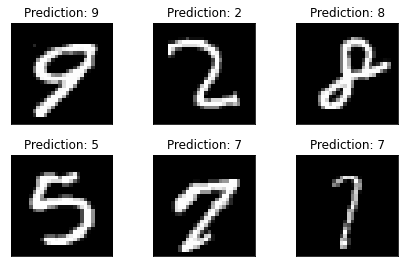

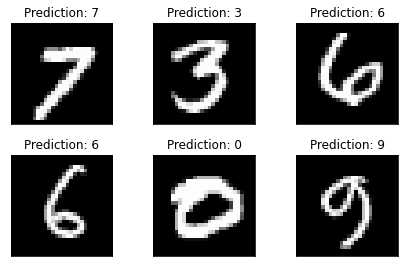

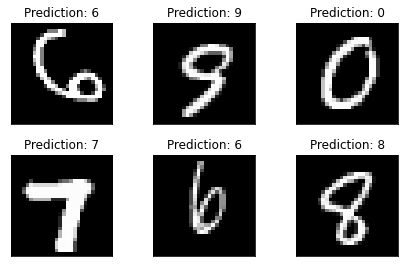

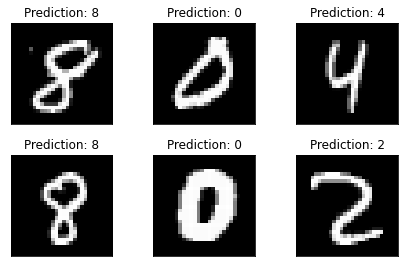

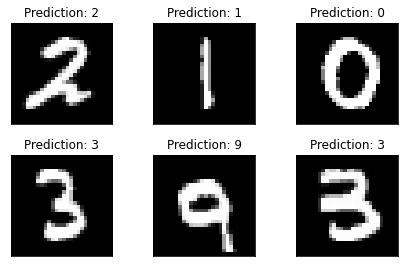

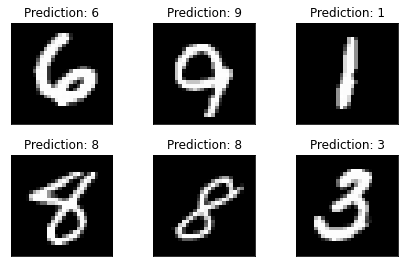

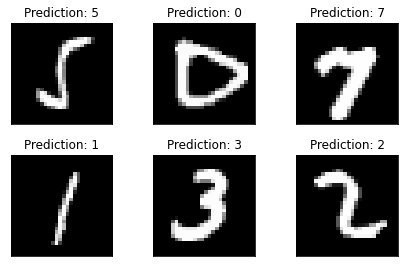

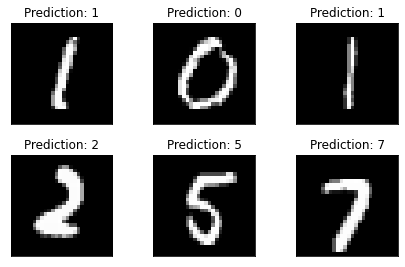

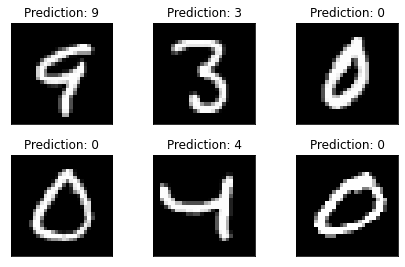

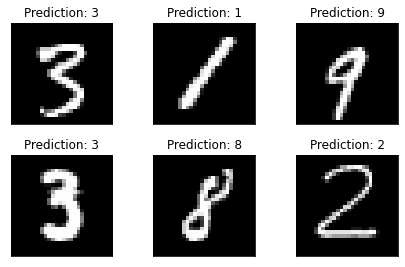

In [3]:

# model = NeuralNetwork()
# model.load_state_dict(torch.load("model.pth"))

model.eval()
for num in range(10):
  examples = enumerate(test_dataloader)
  batch_idx, (x, y) = next(examples)
  with torch.no_grad():
      pred = model(x)
  fig = plt.figure()
  for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(x[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
      pred.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
  plt.show()
